# Michael Wasserstein - Module 2
**1/26/2021**

**Excercises Completed**
1. Getting Started and Modifying Code
2. Explaining Error
3. Exact and Approximate Trajectories in 2D
4. Adding air resistance to the 1D free fall model
5. Compare exact and approximate numerical solutions for 1D free fall with air resistance
6. Euler Simulations of Drag in 2D
7. Physics Extension 4 - Including atmospheric density variation
8. Physics Extension 3 - Is 45° still the maximum range?

I collaborated with Julian, one of my groupmates, on this module. We worked mostly on Exercise 3.

In [1]:
#Import the numpy and matplotlib packages
import numpy as np
import matplotlib.pyplot as plt

### (Required) Exercise 1: 
**Getting Started and Modifying Code**

Copy and modify the code above to make the simulation plot the position versus time and velocity versus time curves for an object thrown vertically upward (as opposed to dropped) at 80 m/s. The time axis should extend at least as long as it takes for the ball to return to its starting height.

# Projectile Motion

## Free Fall in 1D

Two key equations

1. $$ y(t) = y_0 + v_{y0} t + \frac{1}{2} a t^2 $$
2. $$v(t) = v_{y0} + a t$$

In [2]:
#In this cell we define a funciton which will caculate the analytic
#expression for y(t) (equation 1)
def KinematicEq1(y0, v0, a, t):
    '''
    Returns the displacement of an object subject to constant acceleration

    Parameters:
    y0 - initial position (m) - float or int
    v0 - initial velocity (m/s) - float or int
    a - constant acceleration (m/s**2) - float or int
    t - time (s) - float, int, or NumPy array
    '''
    #if t is an array, then y is an array with the same number of points
    y = y0 + v0*t + 0.5*a*t**2 
    return y

In [3]:
#In this cell we define a funciton which will caculate the analytic
#expression for v(t) (equation 2)
def KinematicEq2(v0, a, t):
    '''
    Returns the displacement of an object subject to constant acceleration

    Parameters:
    v0 - initial velocity (m/s) - float or int
    a - constant acceleration (m/s**2) - float or int
    t - time (s) - float, int, or NumPy array
    '''

    v = v0 + a*t      
    return v      

In [4]:
#Now generate the data to plot from the analytic solution

#Input parameters for model
g = 9.8     #acceleration due to gravity (m/s^2)
y_0 = 0      #initial position (m)
v_y0 = 80     #initial vertical velocity (m/s)
t_fin = 20    #Final time (s)

#Define the time points to plot.
t = np.linspace(0, t_fin) #t is an array of 50 points (by default) from 0 to 10 seconds

#Use the analytic solutions to find the position and velocity as a function of time
y = KinematicEq1(y_0, v_y0, -g, t)
v = KinematicEq2(v_y0, -g, t)

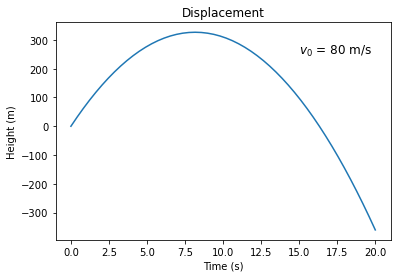

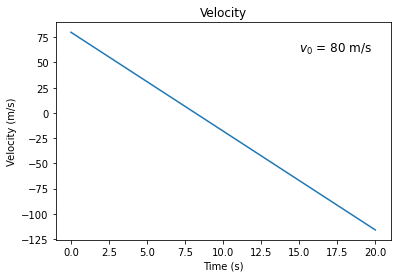

In [5]:
#Now plot the position and velocity as functions of time. 
#The way I'm doing it here plots the two in separate figures
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(t, y)                #Plot position versus t
axy.set_xlabel('Time (s)')    #Label the x-axis
axy.set_ylabel('Height (m)')  #Label the y-axis
axy.text(15, 250, r'$v_0$ = 80 m/s', fontsize=12)   # Label v_0
axy.set_title("Displacement") #Title the plot

#Repeat this for the velocity plot
figv, axv = plt.subplots()    
axv.plot(t, v)
axv.set_xlabel('Time (s)')
axv.set_ylabel('Velocity (m/s)')
axv.set_title('Velocity')
axv.text(15, 60, r'$v_0$ = 80 m/s', fontsize=12)
plt.show()

 ### (Required) Exercise 2: 
 **Explaining Error**

In [6]:
# The following cells are code for Excercise 2

In [7]:
#Lets define a function to encapsulate this algorithm
#It will return the data describing the time, position, and velocity of the 1D trajectory
#We can then manipulate or plot that data as we see fit
def EulerFreeFall1D(y0, vy0, a, t_fin, dt):
    '''
    Performs the Euler Method to solve of the 1D trajectory of an object in free fall near the surface of the earth
    
    Parameters:
    y0 - Initial height (m)
    v0 - Initial velocity (m/s)
    t_fin - Final time of simulation (s)
    dt - Time Step Size (s)
    
    Returns:
    A tuple of NumPy arrays
    (time, vy, y)
    '''
    
    # The Euler algorithm requires us to discretize time, and evolve the position and velocity
    # of the object in discree time steps
    t_steps = int(t_fin/dt) + 1      #number of steps necessary (always rounding up)

    
                                    # Int makes integer, add 1 to round up
        
    # Defines the 1D arrays to be used in the computation and 
    # sets all values in the arrays to zero
    t = np.zeros(t_steps)
    y = np.zeros(t_steps)
    vy = np.zeros(t_steps)

    # Initial conditions. The first index of an array is zero.
    t[0] = 0
    y[0] = y0
    vy[0] = vy0

    # Euler algorithm and evaluation of exact solutions for v and y
    # Use for loop to iterate over the range of time values we want 
    for i in range(0, t_steps-1):
        t[i+1] = t[i] + dt                          #Time increases linearly
        vy[i+1] = vy[i] + a * dt                    #First update the velocity
        y[i+1] = y[i] + vy[i] * dt                  #Then update the position
        
    #We include a return statement that retusn our three NumPy data arrays grouped together in a tuple
    return (t, vy, y)


In [8]:
#Now we call the function we just write to get the data
#The utility of putting it into a function was that we could call it over and over again witht different
#initial conditions if we wanted to, without copying and pasting that large section of code over and 
#over again

#Physical Parameters to pass into our functions
g = 9.8     #acceleration due to gravity (m/s^2)
y_0 = 0      #initial position (m)
v_y0 = 0     #initial vertical velocity (m)
t_fin = 10    #Final time (s)

#Time steps for the Euler method
dt = 0.5

#Generate data using the Euler Method
(time, vy_Euler, y_Euler) = EulerFreeFall1D(y_0, v_y0, -g, t_fin, dt)

#Generate data from the analytic solutions for the same time point
y_Exact = KinematicEq1(y_0, v_y0, -g, time)
v_Exact = KinematicEq2(v_y0, -g, time)

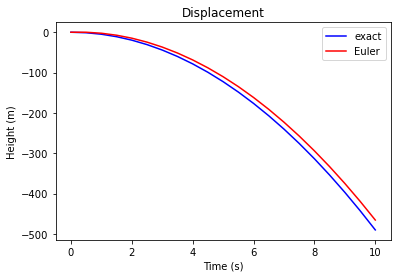

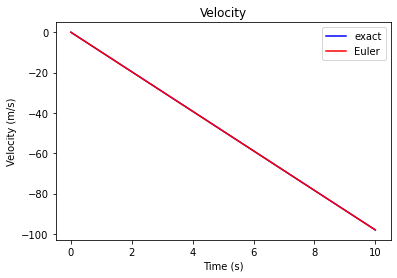

In [9]:
#Now we can plot both the position and velocity, comparing the exact solution to the numeric solution
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(time, y_Exact,'b-', label='exact')                #Plot exact position versus t
axy.plot(time, y_Euler, 'r-', label='Euler')      #Add Euler solution to the plot
axy.set_xlabel('Time (s)')                        #Label the horizontal axis
axy.set_ylabel('Height (m)')                      #Label the vertical axis
axy.set_title("Displacement")                     #Title the plot
axy.legend()                                      #Put a legend on the plot

#Repeat for the velocity plot
figv, axv = plt.subplots()
axv.plot(time, v_Exact, 'b-', label='exact')
axv.plot(time, vy_Euler, 'r-', label='Euler')
axv.set_xlabel('Time (s)')
axv.set_ylabel('Velocity (m/s)')
axv.set_title('Velocity')
axv.legend()
plt.show()

Hmmm. Seems like for the default value of step size I have used, the exact and Euler solution don't agree that well in the position versus time graph. Why do you think that is? Change the step size and find one for which the exact and Euler solutions agree reasonably well through the entire simulation. Produce plots of $v(t)$ and $y(t)$ where each has as least three different curves calculated using the Euler method with different values of $\Delta t$. At least one should be in "good agreement" with the analytic solution. What did you define as "good agreement"?

As shown in the first plot, for the timestep $\Delta t$ = 0.5 s, the exact and Euler solutions don't agree well for position vs. time. I think this occurs because $\Delta t$ is too large to accurately simulate the exact solution using the Euler method. The smaller the timestep is, the closer the result will be to the exact solution, because we will be "nudging" the height to agree with what is expected more frequently.

If we make the timestep be smaller by a factor of 10 so that $\Delta t$ = 0.05 s, we have a the exact and Euler solutions will agree reasonably well.

In [10]:
#Now we call the function we just write to get the data
#The utility of putting it into a function was that we could call it over and over again witht different
#initial conditions if we wanted to, without copying and pasting that large section of code over and 
#over again

#Physical Parameters to pass into our functions
g = 9.8     #acceleration due to gravity (m/s^2)
y_0 = 0      #initial position (m)
v_y0 = 0     #initial vertical velocity (m)
t_fin = 10    #Final time (s)

#Time steps for the Euler method
dt1 = 0.05
dt2 = 0.5
dt3 = 5
dt4 = 0.2

#Generate data using the Euler Method for each timestep
(time1, vy_Euler1v, y_Euler1v) = EulerFreeFall1D(y_0, v_y0, -g, t_fin, dt1)
(time2, vy_Euler2v, y_Euler2v) = EulerFreeFall1D(y_0, v_y0, -g, t_fin, dt2)
(time3, vy_Euler3v, y_Euler3v) = EulerFreeFall1D(y_0, v_y0, -g, t_fin, dt3)
(time4, vy_Euler4v, y_Euler4v) = EulerFreeFall1D(y_0, v_y0, -g, t_fin, dt4)

#Generate data from the analytic solutions for the same time point
y_Exact = KinematicEq1(y_0, v_y0, -g, time1)
v_Exact = KinematicEq2(v_y0, -g, time1)

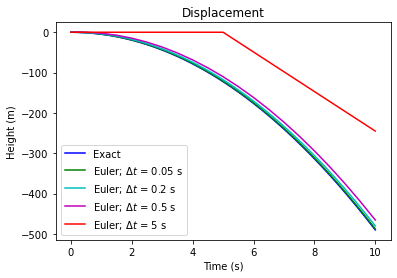

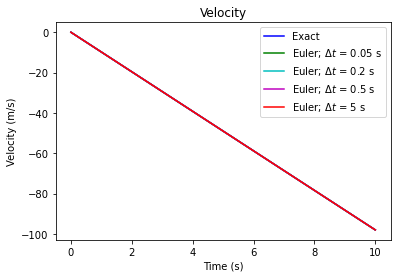

In [11]:
#Now we can plot both the position and velocity, comparing the exact solution to the numeric solution
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(time1, y_Exact,'b-', label='Exact')                #Plot exact position versus t
axy.plot(time1, y_Euler1v, 'g-', label=r'Euler; $\Delta t$ = 0.05 s')      #Add Euler solution to the plot
axy.plot(time4, y_Euler4v, 'c-', label=r'Euler; $\Delta t$ = 0.2 s')      #Add Euler solution to the plot
axy.plot(time2, y_Euler2v, 'm-', label=r'Euler; $\Delta t$ = 0.5 s')      #Add Euler solution to the plot
axy.plot(time3, y_Euler3v, 'r-', label=r'Euler; $\Delta t$ = 5 s')      #Add Euler solution to the plot
axy.set_xlabel('Time (s)')                        #Label the horizontal axis
axy.set_ylabel('Height (m)')                      #Label the vertical axis
axy.set_title("Displacement")                     #Title the plot
axy.legend()                                      #Put a legend on the plot

#Repeat for the velocity plot
figv, axv = plt.subplots()
axv.plot(time1, v_Exact, 'b-', label='Exact')
axv.plot(time1, vy_Euler1v, 'g-', label=r'Euler; $\Delta t$ = 0.05 s')
axv.plot(time4, vy_Euler4v, 'c-', label=r'Euler; $\Delta t$ = 0.2 s')
axv.plot(time2, vy_Euler2v, 'm-', label=r'Euler; $\Delta t$ = 0.5 s')
axv.plot(time3, vy_Euler3v, 'r-', label=r'Euler; $\Delta t$ = 5 s')
axv.set_xlabel('Time (s)')
axv.set_ylabel('Velocity (m/s)')
axv.set_title('Velocity')
axv.legend()
plt.show()

As we can see in the height vs. time plot, the light blue, green, and blue lines are practically on top of each other. Because this is the case, I can reasonly conclude that that when $\Delta t$ = 0.2 s or less (the light blue line), the Euler solution is in "good agreement" with the analytic one. My definition of "good agreement" is if the two lines appear on top of each other. Additionally, the light blue color, where $\Delta t$ = 0.2 s is the largest $\Delta t$ where I can conclude that the Euler and analytic solutions are in good agreement.

**Challenge:** Why does the Euler solution on the velocity versus time graph agree with the exact solution, regardless of time step?

The Euler solution on the velocity versus time graph always agrees with the exact solution because our code looks like `vy[i+1] = vy[i] + a * dt`. We have a `for` loop for the `range` of timesteps, meaning that our `for` loop is longer if $\Delta t$ (dt) is smaller. However, as shown in `vy[i+1] = vy[i] + a * dt`, we always add the acceleration multiplied by the timestep to generate the next item in our array. This means that for a small timestep, we may see velocities like [0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10] in our array, whereas for a larger timestep, we may have something like [0, -2, -4, -6, -8, -10]. But when plotted vs. time in the x-axis, on the same plot, these two arrays will appear exactly the same, as we see in the velocity vs. time plot above.

**Coding Challenge/Extension:** Can some parts of the `for` loop in `EulerFreeFall1D` be readily implemented with NumPy vector/array operations? Why or why not? If so, implement them this way.

Yes! The time part of the `for` loop in `EulerFreeFall1D` can be easily implemented with NumPy array operations. Here is code that will do it:

In [12]:
t_fin = 10
dt = 0.5
t_steps = int(t_fin/dt) + 1
t = np.linspace(0, t_fin, t_steps)

In the above code, we use a final time, a timestep $\Delta t$ and an inital time (0 s). We use the np.linspace() function to generate an array of all times used in the Euler method.

I do not believe that the velocity and height parts of the `for` loop in `EulerFreeFall1D` can be easily implemented with NumPy array operations because they do not increase linearly, as time does.

### (Required) Exercise 3: 
**Exact and Approximate Trajectories in 2D**

Make plots of the trajectory of a projectile in free fall launched in 2-dimensions. So you must now, for each value of time, keep track of both the x-position and y-position, as well as the two components of the velocity vector $v_x$ and $v_y$. 

In [13]:
#In this cell we define a funciton which will caculate the analytic
#expression for y(t), using the trajectory equation
def tragectory(theta_0, v0, a, x):
    '''
    Returns the displacement in y direction of an object subject to constant acceleration

    Parameters:
    theta_0 - initial angle (degrees) - float or int
    v0 - initial velocity (m/s) - float or int
    a - constant acceleration (m/s**2) - float or int
    x - position in x direction (m) - float, int, or NumPy array
    '''
    #if x is an array, then y is an array with the same number of points
    y = np.tan(theta_0) * x + (a / (2 * (v0 * np.cos(theta_0))) ** 2) * x ** 2
    return y

In [14]:
#Lets define a function to encapsulate this algorithm
#It will return the data describing the time, position, and velocity of the 1D trajectory
#We can then manipulate or plot that data as we see fit
def EulerFreeFalltrag(y0, vy0, x0, vx0, a, t_fin, dt):
    '''
    Performs the Euler Method to solve of the 1D trajectory of an object in free fall near the surface of the earth
    
    Parameters:
    y0 - Initial height (m)
    x0 - Initial displacement (m)
    vx0 - Initial y velocity (m/s)
    vy0 - Initial y velocity (m/s)
    t_fin - Final time of simulation (s)
    dt - Time Step Size (s)
    
    
    Returns:
    A tuple of NumPy arrays
    (time, vy, y, vx, x)
    '''
    
    
    # The Euler algorithm requires us to discretize time, and evolve the position and velocity
    # of the object in discree time steps
    t_steps = int(t_fin/dt) + 1      #number of steps necessary (always rounding up)

    
                                    # Int makes integer, add 1 to round up
        
    # Defines the 1D arrays to be used in the computation and 
    # sets all values in the arrays to zero
    t = np.zeros(t_steps)
    y = np.zeros(t_steps)
    vy = np.zeros(t_steps)
    vx = np.zeros(t_steps)
    x = np.zeros(t_steps)

    # Initial conditions. The first index of an array is zero.
    t[0] = 0
    y[0] = y0
    vy[0] = vy0
    x[0] = x0
    vx[0] = vx0

    # Euler algorithm and evaluation of exact solutions for v and y
    # Use for loop to iterate over the range of time values we want 
    for i in range(0, t_steps-1):
        t[i+1] = t[i] + dt                          #Time increases linearly
        vy[i+1] = vy[i] + a * dt        #First update the y velocity
        y[i+1] = y[i] + vy[i] * dt      # Update height
        vx[i+1] = vx[i]                 # Update x velocity (remains same)
        x[i+1] = x[i] + vx[i] * dt
        
    #We include a return statement that returns our five NumPy data arrays grouped together in a tuple
    return (t, vy, y, vx, x)

In [15]:
#Now generate the data to plot from the analytic solution


#Input parameters for model
g = 9.8     #acceleration due to gravity (m/s^2)
theta_0 = 70   # initial angle (degrees)
theta_0_rad = np.radians(theta_0) # Converts our initial angle to radians
x_0 = 0       #initial x position (m)
y_0 = 0        #initial y position (m)
v0 = 10        # initial velocity (m/s)
v_y0 = v0 * np.sin(theta_0_rad)  # initial y velocity (m/s)
v_x0 = v0 * np.cos(theta_0_rad)  # initial x velocity (m/s)
t_fin = 10                   #Final time (s)


#Time steps for the Euler method
dt1 = 0.05
dt2 = 0.5
dt3 = 5
dt4 = 0.2


#Define the time points to plot.
t = np.linspace(0, t_fin, 50)

#Generate data using the Euler Method
(time1, vy_Euler1, y_Euler1, vx_Euler1, x_Euler1) = EulerFreeFalltrag(y_0, v_y0, x_0, v_x0, -g, t_fin, dt1)
(time2, vy_Euler2, y_Euler2, vx_Euler2, x_Euler2) = EulerFreeFalltrag(y_0, v_y0, x_0, v_x0, -g, t_fin, dt2)
(time3, vy_Euler3, y_Euler3, vx_Euler3, x_Euler3) = EulerFreeFalltrag(y_0, v_y0, x_0, v_x0, -g, t_fin, dt3)
(time4, vy_Euler4, y_Euler4, vx_Euler4, x_Euler4) = EulerFreeFalltrag(y_0, v_y0, x_0, v_x0, -g, t_fin, dt4)

#Use the analytic solutions to find the height and velocity as a function of x displacement
y_Exact = KinematicEq1(y_0, v_y0, -g, t)
x_Exact = KinematicEq1(x_0, v_x0, 0, t)
vy_Exact = KinematicEq2(v_y0, -g, t)
vx_Exact = KinematicEq2(v_x0, 0, t)

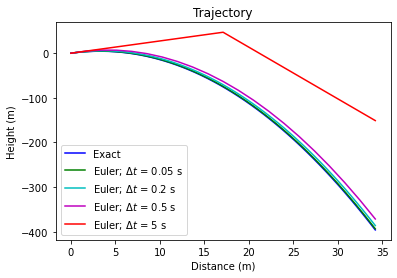

In [16]:
# Here we have a plot of height in the vertical vs. displacement in the horizontal
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(x_Exact, y_Exact,'b-', label='Exact')                #Plot exact position versus x
axy.plot(x_Euler1, y_Euler1, 'g-', label=r'Euler; $\Delta t$ = 0.05 s')
axy.plot(x_Euler4, y_Euler4, 'c-', label=r'Euler; $\Delta t$ = 0.2 s')
axy.plot(x_Euler2, y_Euler2, 'm-', label=r'Euler; $\Delta t$ = 0.5 s')
axy.plot(x_Euler3, y_Euler3, 'r-', label=r'Euler; $\Delta t$ = 5 s')
axy.set_xlabel('Distance (m)')                        #Label the horizontal axis
axy.set_ylabel('Height (m)')                      #Label the vertical axis
axy.set_title("Trajectory")                     #Title the plot
axy.legend()                                      #Put a legend on the plot

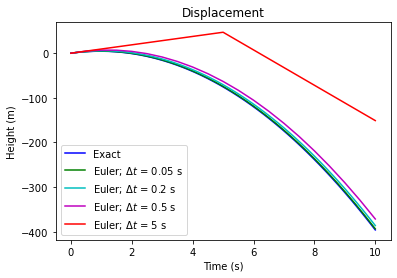

In [17]:
# Here we have a plot of height vs. time
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(t, y_Exact,'b-', label='Exact')                #Plot exact position versus x
axy.plot(time1, y_Euler1, 'g-', label=r'Euler; $\Delta t$ = 0.05 s')
axy.plot(time4, y_Euler4, 'c-', label=r'Euler; $\Delta t$ = 0.2 s')
axy.plot(time2, y_Euler2, 'm-', label=r'Euler; $\Delta t$ = 0.5 s')
axy.plot(time3, y_Euler3, 'r-', label=r'Euler; $\Delta t$ = 5 s')
axy.set_xlabel('Time (s)')                        #Label the horizontal axis
axy.set_ylabel('Height (m)')                      #Label the vertical axis
axy.set_title("Displacement")                     #Title the plot
axy.legend()                                      #Put a legend on the plot

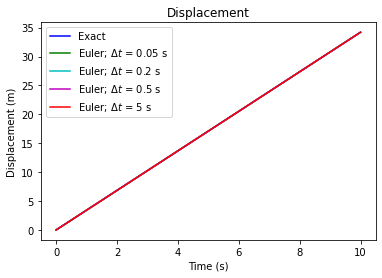

In [18]:
# Here we have a plot of x displacement vs. time
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(t, x_Exact,'b-', label='Exact')                #Plot exact position versus x
axy.plot(time1, x_Euler1, 'g-', label=r'Euler; $\Delta t$ = 0.05 s')
axy.plot(time4, x_Euler4, 'c-', label=r'Euler; $\Delta t$ = 0.2 s')
axy.plot(time2, x_Euler2, 'm-', label=r'Euler; $\Delta t$ = 0.5 s')
axy.plot(time3, x_Euler3, 'r-', label=r'Euler; $\Delta t$ = 5 s')
axy.set_xlabel('Time (s)')                        #Label the horizontal axis
axy.set_ylabel('Displacement (m)')                      #Label the vertical axis
axy.set_title("Displacement")                     #Title the plot
axy.legend()                                      #Put a legend on the plot

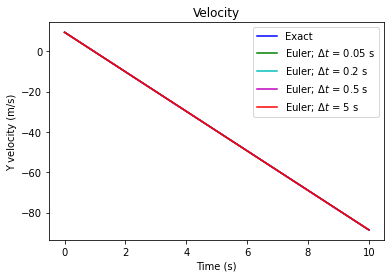

In [19]:
# Here we have a plot of y velocity vs. time
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(t, vy_Exact,'b-', label='Exact')                #Plot exact position versus x
axy.plot(time1, vy_Euler1, 'g-', label=r'Euler; $\Delta t$ = 0.05 s')
axy.plot(time4, vy_Euler4, 'c-', label=r'Euler; $\Delta t$ = 0.2 s')
axy.plot(time2, vy_Euler2, 'm-', label=r'Euler; $\Delta t$ = 0.5 s')
axy.plot(time3, vy_Euler3, 'r-', label=r'Euler; $\Delta t$ = 5 s')
axy.set_xlabel('Time (s)')                        #Label the horizontal axis
axy.set_ylabel('Y velocity (m/s)')                      #Label the vertical axis
axy.set_title("Velocity")                     #Title the plot
axy.legend()                                      #Put a legend on the plot

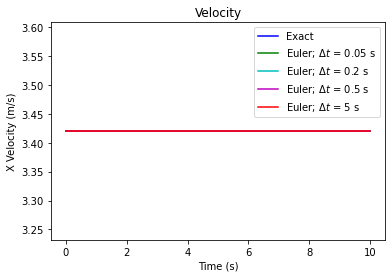

In [20]:
# Here we have a plot of x velocity vs. time
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(t, vx_Exact,'b-', label='Exact')                #Plot exact position versus x
axy.plot(time1, vx_Euler1, 'g-', label=r'Euler; $\Delta t$ = 0.05 s')
axy.plot(time4, vx_Euler4, 'c-', label=r'Euler; $\Delta t$ = 0.2 s')
axy.plot(time2, vx_Euler2, 'm-', label=r'Euler; $\Delta t$ = 0.5 s')
axy.plot(time3, vx_Euler3, 'r-', label=r'Euler; $\Delta t$ = 5 s')
axy.set_xlabel('Time (s)')                        #Label the horizontal axis
axy.set_ylabel('X Velocity (m/s)')                      #Label the vertical axis
axy.set_title("Velocity")                     #Title the plot
axy.legend()                                      #Put a legend on the plot

### (Required) Exercise 4: 
**Adding air resistance to the 1D free fall model**

Add the drag force to your numerical simualtion using the Euler Method. Plot the position versus time and velocity versus time graphs. Include the trajectories in vaccum (no air resitance) on the same plots. You should observe the object reaches a terminal velocity. You'll need to consider a real object, so here are some ideas of air resitantce that can be calculated for spherical objects (i.e. balls). My recommendation is you define a function that computes the drag strength $b$ from these parameters. 

For a sphere $C_D = 0.5$. 
At atmostpheric pressure $\rho = 1.2~\textrm{kg/m}^3$ at sea level ($20^\circ$ and 1 atm of pressure).

For a baseball $m = 0.145$ kg, and $d = 74$ mm (according to [Wikipedia](https://en.wikipedia.org/wiki/Baseball_(ball)))

For an NBA basketball $m = 0.620$ kg, and $d = 75/(2\pi)$ cm (according to [Wikipedia](https://en.wikipedia.org/wiki/Basketball_(ball)))

We will first write code to compute drag strength $b$:

In [21]:
def drag(C_D, rho, radius):
    '''
    Computes drag strength b.
    
    Parameters:
    C_D - drag coefficient (0.5 for a sphere); depends on shape of obgect (dimensionless)
    rho - density of air (generally 1.2 kg/m^3)
    radius - radius of object
    
    Returns:
    Drag strength b
    '''
    
    b = (C_D * rho * np.pi * radius ** 2) / 2
    return b

In [22]:
#Lets define a function to encapsulate this algorithm
#It will return the data describing the time, position, and velocity of the 1D trajectory
#We can then manipulate or plot that data as we see fit
def EulerFreeFallDrag(y0, vy0, a, t_fin, dt, C_D, rho, radius, mass):
    '''
    Performs the Euler Method to solve of the 1D trajectory of an object in free fall near the surface of the earth
    
    Parameters:
    y0 - Initial height (m)
    x0 - Initial displacement (m)
    vx0 - Initial y velocity (m/s)
    vy0 - Initial y velocity (m/s)
    t_fin - Final time of simulation (s)
    dt - Time Step Size (s)
    C_D - drag coefficient (0.5 for a sphere); depends on shape of obgect (dimensionless)
    rho - density of air (generally 1.2 kg/m^3)
    radius - radius of object
    mass -mass of object (kg)
    
    
    Returns:
    A tuple of NumPy arrays
    (time, vy, y, vx, x)
    '''
    
    b = drag(C_D, rho, radius)
    m = mass
    
    # The Euler algorithm requires us to discretize time, and evolve the position and velocity
    # of the object in discree time steps
    t_steps = int(t_fin/dt) + 1      #number of steps necessary (always rounding up)

    
                                    # Int makes integer, add 1 to round up
        
    # Defines the 1D arrays to be used in the computation and 
    # sets all values in the arrays to zero
    t = np.zeros(t_steps)
    y = np.zeros(t_steps)
    vy = np.zeros(t_steps)

    # Initial conditions. The first index of an array is zero.
    t[0] = 0
    y[0] = y0
    vy[0] = vy0

    # Euler algorithm and evaluation of exact solutions for v and y
    # Use for loop to iterate over the range of time values we want 
    for i in range(0, t_steps-1):
        t[i+1] = t[i] + dt                          #Time increases linearly
        vy[i+1] = vy[i] + a * dt - (b / m) * vy[i] ** 2 * np.sign(vy[i]) * dt         #First update the velocity
        y[i+1] = y[i] + vy[i] * dt                  #Then update the position
        
    #We include a return statement that retusn our three NumPy data arrays grouped together in a tuple
    return (t, vy, y)

In [23]:
#Now we call the function we just write to get the data
#The utility of putting it into a function was that we could call it over and over again witht different
#initial conditions if we wanted to, without copying and pasting that large section of code over and 
#over again

#Physical Parameters to pass into our functions
g = 9.8     #acceleration due to gravity (m/s^2)
y_0 = 0      #initial position (m)
v_y0 = 0     #initial vertical velocity (m)
t_fin = 10    #Final time (s)
#Time steps for the Euler method
dt1 = 0.05
dt2 = 0.5
dt3 = 5
dt4 = 0.2

# Use a baseball
mass = 0.145     # (kg)
radius = (74 / 1000) / 2   # (m)
C_D = 0.5
rho = 1.2

#Generate data using the Euler Method
(time1, vy_Eulerd1, y_Eulerd1) = EulerFreeFallDrag(y_0, v_y0, -g, t_fin, dt1, C_D, rho, radius, mass)
(time2, vy_Eulerd2, y_Eulerd2) = EulerFreeFallDrag(y_0, v_y0, -g, t_fin, dt2, C_D, rho, radius, mass)
(time3, vy_Eulerd3, y_Eulerd3) = EulerFreeFallDrag(y_0, v_y0, -g, t_fin, dt3, C_D, rho, radius, mass)
(time4, vy_Eulerd4, y_Eulerd4) = EulerFreeFallDrag(y_0, v_y0, -g, t_fin, dt4, C_D, rho, radius, mass)

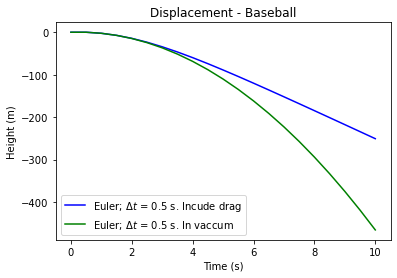

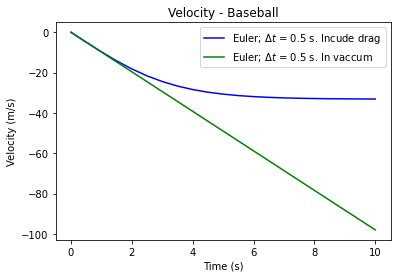

In [24]:
# Here we have a plot of height in the vertical vs. time
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(time2, y_Eulerd2,'b-', label=r'Euler; $\Delta t$ = 0.5 s. Incude drag')                #Plot exact position versus x
axy.plot(time2, y_Euler2v, 'g-', label=r'Euler; $\Delta t$ = 0.5 s. In vaccum')
axy.set_xlabel('Time (s)')                        #Label the horizontal axis
axy.set_ylabel('Height (m)')                      #Label the vertical axis
axy.set_title("Displacement - Baseball")                     #Title the plot
axy.legend()                                      #Put a legend on the plot

# Here we have a plot of velocity in the vertical vs. time
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(time2, vy_Eulerd2,'b-', label=r'Euler; $\Delta t$ = 0.5 s. Incude drag')                #Plot exact position versus x
axy.plot(time2, vy_Euler2v, 'g-', label=r'Euler; $\Delta t$ = 0.5 s. In vaccum')
axy.set_xlabel('Time (s)')                        #Label the horizontal axis
axy.set_ylabel('Velocity (m/s)')                      #Label the vertical axis
axy.set_title("Velocity - Baseball")                     #Title the plot
axy.legend()                                      #Put a legend on the plot

### (Required) Exercise 5: 
**Compare exact and approximate numerical solutions for 1D free fall with air resistance**

Now produce a plot where you compare the exact functions given above to the approximate numerical solution. Indicate the value of $v_{\textrm{ter}}$ on your plot of velocity using a [horizontal line](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hlines.html) placed at the appropriate value. Play around a bit with your step size $\Delta t$ to find the largest value where the simulation and exact solution agree. How does this value of $\Delta t$ compared to that when you compared the exact and Euler solution without air resistance in Exercise 2?

In [25]:
def v_ter_func(m, C_D, rho, radius):
    '''
    Computes terminal velocity v_ter
    
    Parameters:
    m - mass
    C_D - Drag Coefficient
    rho - density of air
    radius - radius of object
    
    Returns:
    v_ter - terminal velocity
    '''
    
    b = drag(C_D, rho, radius)
    v_ter = np.sqrt(m * 9.8 / b)
    
    return v_ter

In [26]:
#In this cell we define a funciton which will caculate the analytic
#expression for v(t) (equation 2)
def ExactDragV(v_term, a, t):
    '''
    Returns the displacement of an object subject to constant acceleration

    Parameters:
    v0 - initial velocity (m/s) - float or int
    a - constant acceleration (m/s**2) - float or int
    t - time (s) - float, int, or NumPy array
    '''

    v = v_term * np.tanh(a * t / v_ter)
    return v     

In [27]:
#In this cell we define a funciton which will caculate the analytic
#expression for y(t) (equation 2)
def ExactDragY(v_term, a, t):
    '''
    Returns the displacement of an object subject to constant acceleration

    Parameters:
    v0 - initial velocity (m/s) - float or int
    a - constant acceleration (m/s**2) - float or int
    t - time (s) - float, int, or NumPy array
    '''

    y = (v_term ** 2 / a) * np.log(np.cosh(a * t / v_ter))
    return y    

In [28]:
#Now generate the data to plot from the analytic solution

#Input parameters for model
g = 9.8     #acceleration due to gravity (m/s^2)
t_fin = 10    #Final time (s)

# Use a baseball
mass = 0.145     # (kg)
radius = (74 / 1000) / 2   # (m)
C_D = 0.5
rho = 1.2

v_ter = v_ter_func(mass, C_D, rho, radius)


#Define the time points to plot.
t = np.linspace(0, t_fin) #t is an array of 50 points (by default) from 0 to 10 seconds

#Use the analytic solutions to find the position and velocity as a function of time
v = ExactDragV(v_ter, -g, t)
y = ExactDragY(v_ter, -g, t)

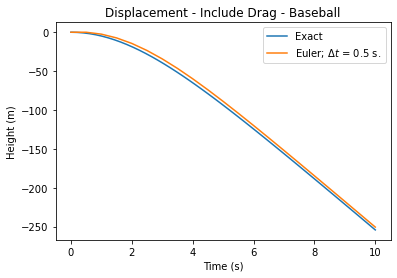

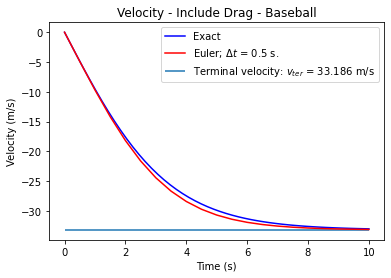

In [29]:
#Now plot the position and velocity as functions of time. 
#The way I'm doing it here plots the two in separate figures
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(t, y, label='Exact')                #Plot position versus t
axy.plot(time2, y_Eulerd2,label = r'Euler; $\Delta t$ = 0.5 s.')
axy.set_xlabel('Time (s)')    #Label the x-axis
axy.set_ylabel('Height (m)')  #Label the y-axis
axy.set_title("Displacement - Include Drag - Baseball") #Title the plot
axy.legend()


#Repeat for the velocity plot
figv, axv = plt.subplots()
axv.plot(t, v, 'b-', label='Exact')
axv.plot(time2, vy_Eulerd2, 'r-', label=r'Euler; $\Delta t$ = 0.5 s.')
axv.set_xlabel('Time (s)')
axv.set_ylabel('Velocity (m/s)')
axv.set_title('Velocity - Include Drag - Baseball')
axv.hlines(-v_ter, 0, 10, label = r'Terminal velocity: $v_{ter}$ = 33.186 m/s')
axv.legend()
plt.show()

Now I repeat the process with $\Delta t$ = 0.2 s, which appears to be the largest value of $\Delta t$ where the exact solution and Euler simulations agree.

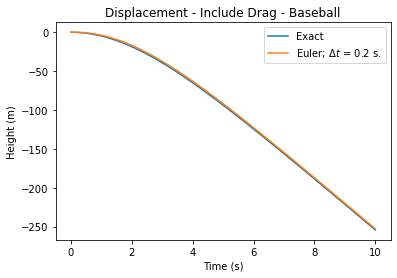

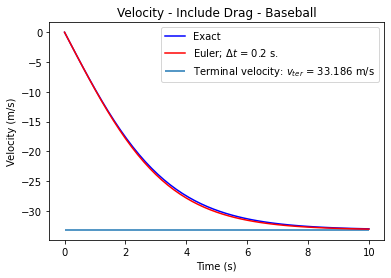

In [30]:
#Now plot the position and velocity as functions of time. 
#The way I'm doing it here plots the two in separate figures
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(t, y, label='Exact')                #Plot position versus t
axy.plot(time4, y_Eulerd4,label = r'Euler; $\Delta t$ = 0.2 s.')
axy.set_xlabel('Time (s)')    #Label the x-axis
axy.set_ylabel('Height (m)')  #Label the y-axis
axy.set_title("Displacement - Include Drag - Baseball") #Title the plot
axy.legend()


#Repeat for the velocity plot
figv, axv = plt.subplots()
axv.plot(t, v, 'b-', label='Exact')
axv.plot(time4, vy_Eulerd4, 'r-', label=r'Euler; $\Delta t$ = 0.2 s.')
axv.set_xlabel('Time (s)')
axv.set_ylabel('Velocity (m/s)')
axv.set_title('Velocity - Include Drag - Baseball')
axv.hlines(-v_ter, 0, 10, label = r'Terminal velocity: $v_{ter}$ = 33.186 m/s')
axv.legend()
plt.show()

In the above plots, $\Delta t$ = 0.2 s, which appears to be the largest value where the simulation and exact solution agree. This is the exact same largest $\Delta t$ as I had without air resistance in Exercise 2.

### (Required) Exercise 6: 
**Euler Simulations of Drag in 2D**

**A)** Write down the four differential equations that you need to solve numerically to ultimately plot a projectile trajectory $y$ vs $x$. You can still do that with pencil and paper, but if you want to learn how to typeset math, you can copy and past some of the math typed into the markdown cells here to typeset your equations into LaTex (a widely used math typesetting language supported in Markdown). Here is a [quick guide to LaTex commands](http://tug.ctan.org/info/undergradmath/undergradmath.pdf). All the code you see in between `$ $` in the Markdown cells is Latex.

Thanks to Prof. Hess for some guidance on this part!

1. $$\frac{dv_y}{dt} = -g - \frac{b v_y}{m}{\sqrt{{v_x}^2 +{v_y}^2}}$$
2. $$\frac{dv_x}{dt} = - \frac{b v_x}{m}{\sqrt{{v_x}^2 +{v_y}^2}}$$
3. $$\frac{dy}{dt} = v_y$$
4. $$\frac{dx}{dt} = v_x$$

**B)** Now add drag to your simulation of 2D trajectories. The components of the velocity unit vector you can calculate by noting that a unit vector is, by definition 
$$\hat{v} = \frac{\vec{v}}{|v|} = \frac{v_x}{|v|}\hat{i} + \frac{v_y}{|v|}\hat{j}$$


In [31]:
def magnitude(vx, vy):
    '''
    Returns magnitude of velocity given parameters 
    vx (horiz velocity) and vy (veritcal velocity)
    '''
    mag_v = np.sqrt(vx ** 2 + vy ** 2)
    
    return mag_v

In [32]:
def v_hat(vx, vy):
    '''
    Returns the unit vector components for a particular vector
    '''
    v_hat = vx / magnitude(vx, vy) + vy / magnitude(vx, vy)
    return v_hat

In [33]:
#Lets define a function to encapsulate this algorithm
#It will return the data describing the time, position, and velocity of the 1D trajectory
#We can then manipulate or plot that data as we see fit
def EulerFreeFallDrag2D(y0, vy0, x0, vx0, a, t_fin, dt, C_D, rho, radius, mass):
    '''
    Performs the Euler Method to solve of the 1D trajectory of an object in free fall near the surface of the earth
    
    Parameters:
    y0 - Initial height (m)
    x0 - Initial displacement (m)
    vx0 - Initial y velocity (m/s)
    vy0 - Initial y velocity (m/s)
    t_fin - Final time of simulation (s)
    dt - Time Step Size (s)
    C_D - drag coefficient (0.5 for a sphere); depends on shape of obgect (dimensionless)
    rho - density of air (generally 1.2 kg/m^3)
    radius - radius of object
    mass -mass of object (kg)
    
    
    Returns:
    A tuple of NumPy arrays
    (time, vy, y, vx, x)
    '''
    
    b = drag(C_D, rho, radius)
    m = mass
    
    # The Euler algorithm requires us to discretize time, and evolve the position and velocity
    # of the object in discree time steps
    t_steps = int(t_fin/dt) + 1      #number of steps necessary (always rounding up)

    
                                    # Int makes integer, add 1 to round up
        
    # Defines the 1D arrays to be used in the computation and 
    # sets all values in the arrays to zero
    t = np.zeros(t_steps)
    y = np.zeros(t_steps)
    vy = np.zeros(t_steps)
    vx = np.zeros(t_steps)
    x = np.zeros(t_steps)

    # Initial conditions. The first index of an array is zero.
    t[0] = 0
    y[0] = y0
    vy[0] = vy0
    x[0] = x0
    vx[0] = vx0

    # Euler algorithm and evaluation of exact solutions for v and y
    # Use for loop to iterate over the range of time values we want 
    for i in range(0, t_steps-1):
        t[i+1] = t[i] + dt                          #Time increases linearly
        vy[i+1] = vy[i] + a * dt - (b / m) * magnitude(vx[i], vy[i]) * vy[i] * dt      #First update the velocity
        y[i+1] = y[i] + vy[i] * dt                  #Then update the position
        vx[i+1] = vx[i] - (b / m) * magnitude(vx[i], vy[i]) * vx[i] * dt
        x[i+1] = x[i] + vx[i] * dt
        
    #We include a return statement that retusn our three NumPy data arrays grouped together in a tuple
    return (t, vy, y, vx, x)

**C)** Produce a plot of the modified trajectory of a projectile launched at $45^{\circ}$ on the same plot as the tractory in vacuum (no air resistance). Pick a launch speed for a particular projecile that shows a clear difference between the two trajectories. Make sure your simulation runs for enough time that you can see the object return to the ground.

In [34]:
#Now generate the data to plot from the analytic solution

#Input parameters for model
g = 9.8     #acceleration due to gravity (m/s^2)
theta_0 = 45   # initial angle
theta_0_rad = np.radians(theta_0)
x_0 = 0       #initial x position (m)
v0 = 30        # initial velocity (m/s)
v_y0 = v0 * np.sin(theta_0_rad)
v_x0 = v0 * np.cos(theta_0_rad)
y_0 = 0 
t_fin = 10
x_fin = 10    #Final x position (m)


#Time steps for the Euler method
dt1 = 0.05
dt2 = 0.5
dt3 = 5

#Define the time points to plot.
x = np.linspace(x_0, x_fin) #t is an array of 50 points (by default) from 0 to 10 seconds
t = np.linspace(0, t_fin, 50)

# Use a baseball
mass = 0.145     # (kg)
radius = (74 / 1000) / 2   # (m)
C_D = 0.5
rho = 1.2

#Generate data using the Euler Method
# With Drag first
(time1, vy_Euler1d, y_Euler1d, vx_Euler1d, x_Euler1d) = EulerFreeFallDrag2D(y_0, v_y0, x_0, v_x0, -g, t_fin, dt1, C_D, rho, radius, mass)
# Now in vacuum
(time1, vy_Euler1, y_Euler1, vx_Euler1, x_Euler1) = EulerFreeFalltrag(y_0, v_y0, x_0, v_x0, -g, t_fin, dt1)

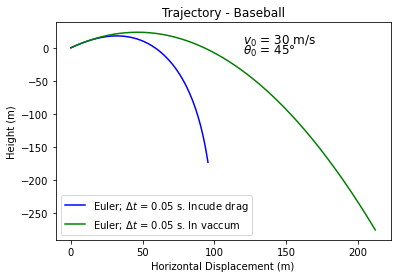

In [35]:
#### Here we have a plot of height in the vertical vs. displacement in the horizontal
figy, axy = plt.subplots()    #Create a new figure object and its associated axes'
axy.plot(x_Euler1d, y_Euler1d,'b-', label=r'Euler; $\Delta t$ = 0.05 s. Incude drag')    #Plot exact position versus x
axy.plot(x_Euler1, y_Euler1, 'g-', label=r'Euler; $\Delta t$ = 0.05 s. In vaccum')
axy.set_xlabel('Horizontal Displacement (m)')                        #Label the horizontal axis
axy.set_ylabel('Height (m)')                      #Label the vertical axis
axy.set_title("Trajectory - Baseball")                     #Title the plot
axy.legend()                                      #Put a legend on the plot
axy.text(120, 6, r'$v_0$ = 30 m/s', fontsize=12)
axy.text(120, -10, r'$\theta_0$ = 45°', fontsize=12)
plt.show()

I referred to this link to get text in my plot:

https://matplotlib.org/3.1.0/tutorials/text/text_intro.html

**D)** Double check the simulation for a few different values of $\Delta t$ and notice the plot changes if $\Delta t$ gets too large. Produce a plot with at least four different trajectories calculated with the same initial conditions, but different values of $\Delta t$. What value of $\Delta t$ is "just small enough" to not notice any difference between plots, and how does this value compare to what you found in Exercises 2 and 5? 

In [36]:
#Now generate the data to plot from the analytic solution
#Input parameters for model
g = 9.8     #acceleration due to gravity (m/s^2)
theta_0 = 45   # initial angle
x_0 = 0       #initial x position (m)
v0 = 30        # initial velocity (m/s)
theta_0_rad = np.radians(theta_0)
v_y0 = v0 * np.sin(theta_0_rad)
v_x0 = v0 * np.cos(theta_0_rad)
y_0 = 0 
t_fin = 10
x_fin = 10    #Final x position (m)


#Time steps for the Euler method
dt1 = 0.05
dt2 = 0.5
dt3 = 5
dt4 = 0.2
dt5 = 2.5

#Define the time points to plot.
x = np.linspace(x_0, x_fin) #t is an array of 50 points (by default) from 0 to 10 seconds
t = np.linspace(0, t_fin, 50)

# Use a baseball
mass = 0.145     # (kg)
radius = (74 / 1000) / 2   # (m)
C_D = 0.5
rho = 1.2

#Generate data using the Euler Method
# With Drag first
(time1, vy_Euler1d, y_Euler1d, vx_Euler1d, x_Euler1d) = EulerFreeFallDrag2D(y_0, v_y0, x_0, v_x0, -g,
                                                                            t_fin, dt1, C_D, rho, radius, mass)
(time2, vy_Euler2d, y_Euler2d, vx_Euler2d, x_Euler2d) = EulerFreeFallDrag2D(y_0, v_y0, x_0, v_x0, -g, 
                                                                            t_fin, dt2, C_D, rho, radius, mass)
(time3, vy_Euler3d, y_Euler3d, vx_Euler3d, x_Euler3d) = EulerFreeFallDrag2D(y_0, v_y0, x_0, v_x0, -g, 
                                                                            t_fin, dt3, C_D, rho, radius, mass)
(time4, vy_Euler4d, y_Euler4d, vx_Euler4d, x_Euler4d) = EulerFreeFallDrag2D(y_0, v_y0, x_0, v_x0, -g, 
                                                                            t_fin, dt4, C_D, rho, radius, mass)
(time5, vy_Euler5d, y_Euler5d, vx_Euler5d, x_Euler5d) = EulerFreeFallDrag2D(y_0, v_y0, x_0, v_x0, -g, 
                                                                            t_fin, dt5, C_D, rho, radius, mass)

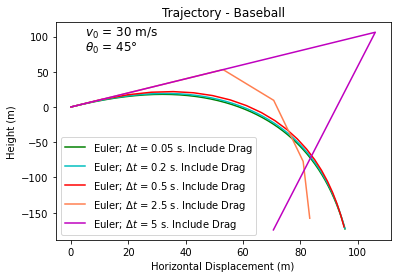

In [37]:
# Here we have a plot of x displacement vs. time
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(x_Euler1d, y_Euler1d, 'g-', label=r'Euler; $\Delta t$ = 0.05 s. Include Drag')
axy.plot(x_Euler4d, y_Euler4d, 'c-', label=r'Euler; $\Delta t$ = 0.2 s. Include Drag')
axy.plot(x_Euler2d, y_Euler2d, 'r-', label=r'Euler; $\Delta t$ = 0.5 s. Include Drag')
axy.plot(x_Euler5d, y_Euler5d, 'coral', label=r'Euler; $\Delta t$ = 2.5 s. Include Drag')
axy.plot(x_Euler3d, y_Euler3d, 'm-', label=r'Euler; $\Delta t$ = 5 s. Include Drag')
axy.set_xlabel('Horizontal Displacement (m)')                        #Label the horizontal axis
axy.set_ylabel('Height (m)')                      #Label the vertical axis
axy.set_title("Trajectory - Baseball")                     #Title the plot
axy.legend()                                      #Put a legend on the plot
axy.text(5, 100, r'$v_0$ = 30 m/s', fontsize=12)
axy.text(5, 80, r'$\theta_0$ = 45°', fontsize=12)
plt.show()

From the above plot, we can see that a value for $\Delta t$ of $\Delta t$ = 0.2 s is just large enough to not notice a difference between plots. It turns out that this is the exact same value I found in Exercises 2 and 5.

I had an interesting discussion with Prof. Herdman about the pink line in the above plot, which is physically impossible, but a function of the large timestep ($\Delta t$ = 5 s) that I used. With each new timestep, the height gets "nudged" in a specific direction, and we have a large "nudge" here. In the `for` loop I have vertical velocity as `vx[i+1] = vx[i] - (b / m) * magnitude(vx[i], vy[i]) * vx[i] * dt`. The minus sign next to `(b / m)` causes `vx[i]` to be less than `vx[i+1]` and in the cause of the pink line, it is so much less that it causes the horizontal displacement to decrease. This is because the `dt` term in the code is so large. Physically, though, this would not happen.

**E)** Comment on what drag has done to the shape of the trajectory.

Drag has caused the trajectory to have a lower maximum hight and a smaller maximum horizontal displacement. Another way to put it is that it has decreased the radius of the curve produced by the projectile

**F)** Plot the magnitude of the velocity over enough time to observe the object approach a terminal velocity.

In [38]:

#Now generate the data to plot from the analytic solution
#Input parameters for model
g = 9.8     #acceleration due to gravity (m/s^2)
theta_0 = 45   # initial angle
x_0 = 0       #initial x position (m)
v0 = 30        # initial velocity (m/s)
theta_0_rad = np.radians(theta_0)
v_y0 = v0 * np.sin(theta_0_rad)
v_x0 = v0 * np.cos(theta_0_rad)
y_0 = 0 
t_fin = 30
x_fin = 10    #Final x position (m)


#Time steps for the Euler method
dt4 = 0.2

#Define the time points to plot.
x = np.linspace(x_0, x_fin) #t is an array of 50 points (by default) from 0 to 10 seconds
t = np.linspace(0, t_fin)

# Use a baseball
mass = 0.145     # (kg)
radius = (74 / 1000) / 2   # (m)
C_D = 0.5       # for sphere
rho = 1.2        # atmosphere

#Generate data using the Euler Method
# With Drag first
(time4, vy_Euler4d, y_Euler4d, vx_Euler4d, x_Euler4d) = EulerFreeFallDrag2D(y_0, v_y0, x_0, v_x0, -g, 
                                                                            t_fin, dt4, C_D, rho, radius, mass)

33.186366371209864


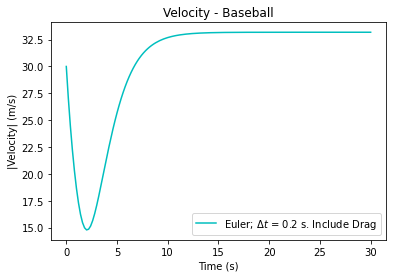

In [39]:
mag_v = magnitude(vx_Euler4d, vy_Euler4d)
print(mag_v[-1])

# Here we have a plot of x displacement vs. time
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(time4, mag_v, 'c-', label=r'Euler; $\Delta t$ = 0.2 s. Include Drag')
axy.set_xlabel('Time (s)')                        #Label the horizontal axis
axy.set_ylabel('|Velocity| (m/s)')                      #Label the vertical axis
axy.set_title("Velocity - Baseball")                     #Title the plot
axy.legend()                                      #Put a legend on the plot

In the above plot, we can see the ball slow down initially, an then reach a terminal velocity as time progresses. The magnitude of this terminal velocity is approximately $|v_{ter}|$ = 33.1864 m/s, as determined from my print statement `print(mag_v[-1])`.

### Physics Extension 4
**Including atmospheric density variation**

To get an accurate trajectory for a projectile one must take into account several complications which can be accounted for in the numerical framework. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron connonball (diameter 15 cm, density 7.8 g/cm$^3$) that is fired with intial velocity 300 m/s at 50 degrees above the horizontal. Assume the atmospheric density falls off expoentially with height
$$\rho(y) = \rho_0 \exp(-y/\lambda)$$
where $\rho_0 = 1.2~\textrm{kg/m}^3$ is the atmospheric pressure at ground level, and $\lambda \approx 10,000~\textrm{m}$ is the empirical  decay coefficient of the pressure with increasing height.

**A)** Modify your simulation to account for this changing atmospheric pressure, and and solve numerically for $x(t)$ and $y(t)$ for $0 \leq t \leq 35$ s. Plot the ball's trajectory and find its horizontal range.

In [40]:
def rho_func(y):
    '''
    Returns atmospheric density as a function of height
    '''
    rho_height = 1.2 * np.exp(-y / 10000)
    return rho_height

In [41]:
#Lets define a function to encapsulate this algorithm
#It will return the data describing the time, position, and velocity of the 1D trajectory
#We can then manipulate or plot that data as we see fit
def EulerFreeFallDrag2DAtmos(y0, vy0, x0, vx0, a, t_fin, dt, C_D, rho, radius, mass):
    '''
    Performs the Euler Method to solve of the 1D trajectory of an object in free fall near the surface of the earth
    
    Parameters:
    y0 - Initial height (m)
    x0 - Initial displacement (m)
    vx0 - Initial y velocity (m/s)
    vy0 - Initial y velocity (m/s)
    t_fin - Final time of simulation (s)
    dt - Time Step Size (s)
    C_D - drag coefficient (0.5 for a sphere); depends on shape of obgect (dimensionless)
    rho - density of air (generally 1.2 kg/m^3)
    radius - radius of object
    mass -mass of object (kg)
    
    
    Returns:
    A tuple of NumPy arrays
    (time, vy, y, vx, x)
    '''
    
    
    m = mass
    
    # The Euler algorithm requires us to discretize time, and evolve the position and velocity
    # of the object in discree time steps
    t_steps = int(t_fin/dt) + 1      #number of steps necessary (always rounding up)

    
                                    # Int makes integer, add 1 to round up
        
    # Defines the 1D arrays to be used in the computation and 
    # sets all values in the arrays to zero
    t = np.zeros(t_steps)
    y = np.zeros(t_steps)
    vy = np.zeros(t_steps)
    vx = np.zeros(t_steps)
    x = np.zeros(t_steps)
    rho = np.zeros(t_steps)
    b = np.zeros(t_steps)

    # Initial conditions. The first index of an array is zero.
    t[0] = 0
    y[0] = y0
    vy[0] = vy0
    x[0] = x0
    vx[0] = vx0
    rho[0] = 1.2
    b[0] = drag(C_D, rho[0], radius)

    # Euler algorithm and evaluation of exact solutions for v and y
    # Use for loop to iterate over the range of time values we want 
    for i in range(0, t_steps-1):
        t[i+1] = t[i] + dt   
        y[i+1] = y[i] + vy[i] * dt
        x[i+1] = x[i] + vx[i] * dt
        rho[i+1] = rho_func(y[i])
        b[i+1] = drag(C_D, rho[i], radius)
        vy[i+1] = vy[i] + a * dt - (b[i] / m) * magnitude(vx[i], vy[i]) * vy[i] * dt       
        vx[i+1] = vx[i] - (b[i] / m) * magnitude(vx[i], vy[i]) * vx[i] * dt
        
        
    #We include a return statement that retusn our three NumPy data arrays grouped together in a tuple
    return (t, vy, y, vx, x)

In [42]:
#Now generate the data to plot from the analytic solution
#Input parameters for model
g = 9.8     #acceleration due to gravity (m/s^2)
theta_0 = 50   # initial angle
theta_0_rad = np.radians(theta_0)
x_0 = 0       #initial x position (m)
v0 = 300        # initial velocity (m/s)
v_y0 = v0 * np.sin(theta_0_rad)
v_x0 = v0 * np.cos(theta_0_rad)
y_0 = 0 
t_fin = 35


#Time steps for the Euler method
dt4 = 0.2

#Define the time points to plot.
t = np.linspace(0, t_fin, 50)

# Use an iron cannonball (diameter 15 cm, density 7.8 g/cm^3)
radius = (15 / 100) / 2   # (m)
volume = (4/3) * np.pi * radius ** 3  # (m ^3)
density = 7.8 * 1000    #(kg/ m^3)
mass = volume * density
C_D = 0.5

#Generate data using the Euler Method
# With Drag first
(time4, vy_Euler4da, y_Euler4da, vx_Euler4da, x_Euler4da) = EulerFreeFallDrag2DAtmos(y_0, v_y0, x_0, v_x0, -g, 
                                                                            t_fin, dt4, C_D, rho, radius, mass)

Text(5, 880, '$\\theta_0$ = 50°')

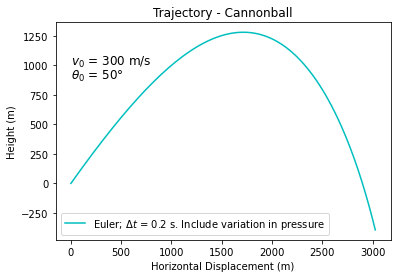

In [43]:
# Here we have a plot of x displacement vs. time
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(x_Euler4da, y_Euler4da, 'c-', label=r'Euler; $\Delta t$ = 0.2 s. Include variation in pressure')
axy.set_xlabel('Horizontal Displacement (m)')                        #Label the horizontal axis
axy.set_ylabel('Height (m)')                      #Label the vertical axis
axy.set_title("Trajectory - Cannonball")                     #Title the plot
axy.legend()                                      #Put a legend on the plot
axy.text(5, 1000, r'$v_0$ = 300 m/s', fontsize=12)
axy.text(5, 880, r'$\theta_0$ = 50°', fontsize=12)

In [44]:
# Code to determine range of projectile
idx = np.argwhere(np.diff(np.sign(y_Euler4d - np.zeros(len(x_Euler4d))))).flatten()
x_Euler4d[idx[1]]

58.656136020960666

From the above code, we can see that the range of the projectile is 2783.3934394341422 m. 

For inspiration for writing the above code, I referred to a stack overflow page:
https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value

Esentially, we see where the difference between y values in the Euler y position array and 0 are 0, and that is the index in the Euler simulation corresponding with the range of the projectile. Then I just use that index to find the value in the x position array correspoinding with that index.

**B)** Do the same calculation ignoring the variation in atmospheric density (keep the density fixed at $\rho_0$), and yet again ignoring air resistnace entirely. Plot all three trajectories for appropriate time intervals on the same graph. You will find that in this case air resistance makes a huge difference and that the variation of air resistance makes a small, but not negligible, difference.

In [45]:
#Now generate the data to plot from the analytic solution

#Input parameters for model
g = 9.8     #acceleration due to gravity (m/s^2)
theta_0 = 50   # initial angle
theta_0_rad = np.radians(theta_0)
x_0 = 0       #initial x position (m)
v0 = 300        # initial velocity (m/s)
v_y0 = v0 * np.sin(theta_0_rad)
v_x0 = v0 * np.cos(theta_0_rad)
y_0 = 0 
t_fin = 35

#Time steps for the Euler method
dt4 = 0.2

#Define the time points to plot.
t = np.linspace(0, t_fin, 50)

# Use an iron cannonball (diameter 15 cm, density 7.8 g/cm^3)
radius = (15 / 100) / 2   # (m)
volume = (4/3) * np.pi * radius ** 3  # (m ^3)
density = 7.8 * 1000    #(kg/ m^3)
mass = volume * density
C_D = 0.5

#Generate data using the Euler Method
# With Drag first
(time4, vy_Euler4d, y_Euler4d, vx_Euler4d, x_Euler4d) = EulerFreeFallDrag2D(y_0, v_y0, x_0, v_x0, -g, t_fin, dt4, 
                                                                            C_D, rho, radius, mass)
# Now in vacuum
(time4, vy_Euler4, y_Euler4, vx_Euler4, x_Euler4) = EulerFreeFalltrag(y_0, v_y0, x_0, v_x0, -g, t_fin, dt4)
# With Drag and variation in atmospheric pressure
(time4, vy_Euler4da, y_Euler4da, vx_Euler4da, x_Euler4da) = EulerFreeFallDrag2DAtmos(y_0, v_y0, x_0, v_x0, -g, 
                                                                            t_fin, dt4, C_D, rho, radius, mass)

Text(5, 2200, '$\\theta_0$ = 50°')

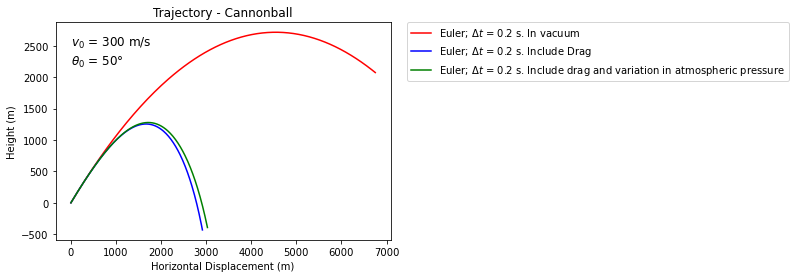

In [46]:
# Here we have a plot of trajectory for a vacuum, drag, drag with variation in atmospheric pressure
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(x_Euler4, y_Euler4, 'r-', label=r'Euler; $\Delta t$ = 0.2 s. In vacuum')
axy.plot(x_Euler4d, y_Euler4d, 'b-', label=r'Euler; $\Delta t$ = 0.2 s. Include Drag')
axy.plot(x_Euler4da, y_Euler4da, 'g-', label=r'Euler; $\Delta t$ = 0.2 s. Include drag and variation in atmospheric pressure')
axy.set_xlabel('Horizontal Displacement (m)')                        #Label the horizontal axis
axy.set_ylabel('Height (m)')                      #Label the vertical axis
axy.set_title("Trajectory - Cannonball")                     #Title the plot
axy.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)         
axy.text(5, 2500, r'$v_0$ = 300 m/s', fontsize=12)
axy.text(5, 2200, r'$\theta_0$ = 50°', fontsize=12)

For some help with formatting the legend in the above plot, I used this link:

https://matplotlib.org/3.3.3/gallery/userdemo/simple_legend01.html#sphx-glr-gallery-userdemo-simple-legend01-py

We can see that including drag causes a huge variation in the trajectory, but including variation in atmospheric pressure only causes a slight additional variation.

### Physics Extension 3: 
**Is $45^{\circ}$ still the maximum range?**

For a projecile launched in vacuum, the maximium range (i.e. horizontal distance when it returns to its starting height) is achieved with a launch angle of $45^\circ$. Is this still true when you introduce air resistance? 

For a fixed launch speed and drag strength, answer this question. A **good** answer should show a plot of the range as a function of a launch angle, and numerically find where the maximum value is. A **great** answer might check this for a few different values of $b$, to see whether their result depdends on the strenght of the drag. An **exceptional** solution might even show a plot of maximum range angle versus $b$, having collected data by looping over a range of values of $b$. 

In [47]:
def traj_range(v_0, theta_0):
    '''
    Calculates the range of a projectile based on parameters:
    
    v_0 - initial velocity (m/s)
    theta_0 - initial angle (degrees)
    
    returns:
    range - (m)
    '''
    theta_0_rad = np.radians(theta_0)
    r = (v_0 ** 2) * np.sin(2 * theta_0_rad) / 9.8
    return r

I found the above range equation from this resource:
https://openstax.org/books/university-physics-volume-1/pages/4-3-projectile-motion

In [48]:
thetas = np.linspace(0, 90, 91)
v_0 = 30      # We'll keep v_0 consistent at 30 m/s
ranges = traj_range(v_0, thetas)    # find ranges for different angles

First, I decided to plot range as a function of angle in a vacuum.

Text(0.5, 1.0, 'Range')

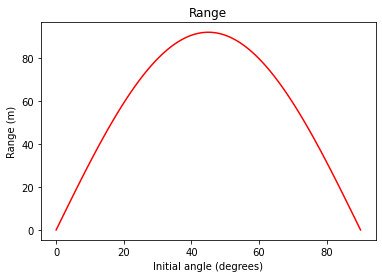

In [49]:
figa, axa = plt.subplots()    #Create a new figure object and its associated axes
axa.plot(thetas, ranges, 'r-')
axa.set_xlabel(r'Initial angle (degrees)')                        #Label the horizontal axis
axa.set_ylabel('Range (m)')                      #Label the vertical axis
axa.set_title("Range")                     #Title the plot  

As expected, the maximum range occurs when $\theta_0$ = 45°. Now we'll take a look at what  drag does.

In [50]:
#Now generate the data to plot from the analytic solution
#Input parameters for model

thetas = np.linspace(0, 90, 91)   # creates an array of all integer angles from 0 to 90
thetas_0_rad = np.radians(thetas) # convert angles to radians
   
g = 9.8     #acceleration due to gravity (m/s^2)
x_0 = 0       #initial x position (m)
v0 = 30        # initial velocity (m/s)
y_0 = 0        # initial y position (m)
t_fin = 10     # final time for simulation (s)

#Time steps for the Euler method
dt1 = 0.05

#Define the time points to plot.
t = np.linspace(0, t_fin, 50)

# Use a baseball
mass = 0.145     # (kg)
radius = (74 / 1000) / 2   # (m)
C_D = 0.5                  # for sphere
rho = 1.2                  # atmospheric



#Generate data using the Euler Method
#### Note: I tried to do this using numpy arrays, but it just didn't work
#### So I resorted to using lists
# Drag first
data_listx = []    # Empty list for all x values
data_listy = []    # Empty list for all y values
for i in thetas_0_rad:       # Loop through all angles
    v_y0 = v0 * np.sin(i)    # Get y velocity based on theta
    v_x0 = v0 * np.cos(i)    # Get x velocity based on theta
    
    # Conduct simulations and add to lists
    # We will have two lists that contain 90 arrays for all angles
    data_listx.append(EulerFreeFallDrag2D(y_0, v_y0, x_0, v_x0, -g, t_fin, dt1, C_D, rho, radius, mass)[4])
    data_listy.append(EulerFreeFallDrag2D(y_0, v_y0, x_0, v_x0, -g, t_fin, dt1, C_D, rho, radius, mass)[2])

In [51]:
# Now we find index where data has y value changing from positive to negative
indexes = []
for angle in data_listy:
    count = 1    # we start at one because otherwise 
    while count != -1:
        if np.sign(angle[count]) != np.sign(angle[count + 1]):
            indexes.append(count)   
            count = -1
        else:
            count += 1

In [52]:
# From what we learned above, get range for each
ranges = []
count = 0
# Loop through x values for each angle
for theta in data_listx:
    ranges.append(theta[indexes[count]])      # Use the index corresponding to the range
    count += 1                                # In order to cycle through our list of indexes generated above
    
# Find the angle corresponding to the maximum range and print it; must add 1 since we don't want index numbers, 
# we want angle    
max_angle_range = ranges.index(max(ranges)) + 1  
print(max_angle_range)

42


The integer value of an angle that gives the maximum range when we include drag for a baseball is 42°.

In [53]:
# Convert to np array
ranges_array =np.array(ranges)

Text(5, 55, '$v_0$ = 30 m/s')

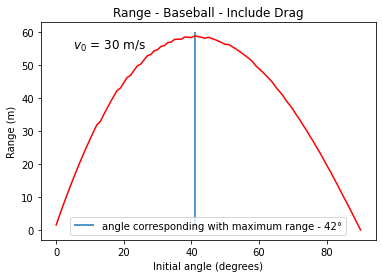

In [54]:
figa, axa = plt.subplots()    #Create a new figure object and its associated axes
axa.plot(thetas, ranges_array, 'r-')
axa.set_xlabel(r'Initial angle (degrees)')                        #Label the horizontal axis
axa.set_ylabel('Range (m)')                      #Label the vertical axis
axa.vlines(41, 0, 60, label = 'angle corresponding with maximum range - 42°')
axa.set_title("Range - Baseball - Include Drag")                     #Title the plot
axa.legend()
axa.text(5, 55, r'$v_0$ = 30 m/s', fontsize=12)

Rather than the maximum range being when $\theta_0$ = 45°, when we include drag for a baseball it is 42°. 